데이터 편향성 확인을 위한 코드

In [1]:
import torch
import h5py
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# 데이터셋 경로와 키 설정
data_dir = '/home/Data/train/image'
input_key = 'image_input'
target_key = 'image_label'

def load_data(file_path, input_key, target_key, device='cuda'):
    with h5py.File(file_path, 'r') as f:
        masked_data = torch.tensor(np.array(f[input_key]), device=device)
        original_data = torch.tensor(np.array(f[target_key]), device=device)
    return masked_data, original_data

기존의 data/load_data 모듈을 활용할 수 있는 방법은 없을까?
우리에게 주어진 데이터셋의 구조를 한 번 더 확인해볼 필요가 있을 듯

In [9]:
def calculate_deviation(masked, original):
    deviation = torch.abs(original - masked)
    return deviation

def visualize_deviation_histogram(deviation, title='Deviation between Original and Masked Data'):
    deviation_cpu = deviation.cpu().numpy()
    plt.figure(figsize=(10, 6))
    plt.hist(deviation_cpu.flatten(), bins=50, alpha=0.75)
    plt.title(title)
    plt.xlabel('Deviation')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
def analyze_bias(data_dir, input_key, target_key, device='cuda'):
    all_deviation = []

    # 데이터 파일 리스트 가져오기
    data_files = list(Path(data_dir).rglob('*.h5'))
    
    for file_path in tqdm(data_files, desc="Processing files"):
        masked_data, original_data = load_data(file_path, input_key, target_key, device)
        deviation = calculate_deviation(masked_data, original_data)
        all_deviation.append(deviation.cpu().numpy())
    
    # 전체 편차 데이터 결합
    all_deviation = np.concatenate(all_deviation)
    visualize_deviation_histogram(torch.tensor(all_deviation), title="Overall Deviation Histogram")

어떻게 시각화해야 데이터의 편향성을 쉽게 찾아낼 수 있을까?
관련 모듈이 존재할까?

Processing files: 100%|██████████| 356/356 [00:56<00:00,  6.25it/s]


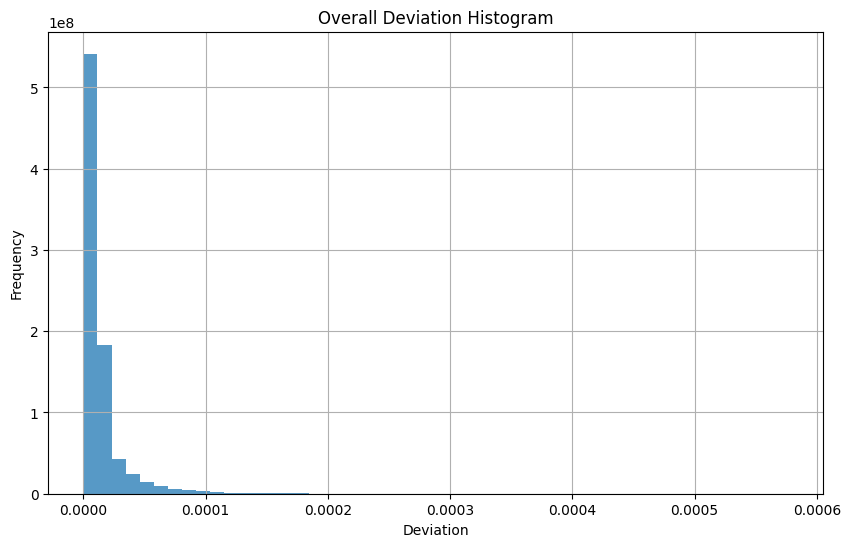

In [10]:
analyze_bias(data_dir, input_key, target_key)

## 데이터 형태 확인

# 데이터셋 경로와 키 설정
data_dir = '/home/Data/train/image'
input_key = 'image_input'
target_key = 'image_label'

def load_data(file_path, input_key, target_key, device='cuda'):
    with h5py.File(file_path, 'r') as f:
        masked_data = torch.tensor(np.array(f[input_key]), device=device)
        original_data = torch.tensor(np.array(f[target_key]), device=device)
    return masked_data, original_data

### 이미지 확인

In [ ]:
import h5py
from pathlib import Path

def check_hdf5_files_structure(data_dir):
    data_dir = Path(data_dir)
    hdf5_files = list(data_dir.glob("*.h5"))  # .h5 파일만 선택

    for hdf5_file in hdf5_files:
        print(f"Checking file: {hdf5_file}")
        with h5py.File(hdf5_file, 'r') as f:
            def print_attrs(name, obj):
                if isinstance(obj, h5py.Dataset):
                    print(f"Dataset: {name}")
                    print(f" - Shape: {obj.shape}")
                    print(f" - Dtype: {obj.dtype}")
                elif isinstance(obj, h5py.Group):
                    print(f"Group: {name}")
            
            f.visititems(print_attrs)
        print("\n")

# 데이터 디렉토리 설정
data_dir = '/home/Data/train/image'

# 디렉토리 구조 확인
check_hdf5_files_structure(data_dir)

### k-space 확인

In [ ]:
# 데이터 디렉토리 설정
data_dir = '/home/Data/train/kspace'

# 디렉토리 구조 확인
check_hdf5_files_structure(data_dir)

### 함께 확인

In [ ]:
import h5py
from pathlib import Path

def check_hdf5_files_structure(file_path):
    print(f"Checking file: {file_path}")
    with h5py.File(file_path, 'r') as f:
        def print_attrs(name, obj):
            if isinstance(obj, h5py.Dataset):
                print(f"Dataset: {name}")
                print(f" - Shape: {obj.shape}")
                print(f" - Dtype: {obj.dtype}")
            elif isinstance(obj, h5py.Group):
                print(f"Group: {name}")
        
        f.visititems(print_attrs)
    print("\n")

def find_common_files(dir1, dir2):
    dir1_files = {f.name for f in Path(dir1).glob("*.h5")}
    dir2_files = {f.name for f in Path(dir2).glob("*.h5")}
    common_files = dir1_files.intersection(dir2_files)
    return common_files

# 디렉토리 설정
data_dir_kspace = '/home/Data/train/kspace'
data_dir_image = '/home/Data/train/image'

# 공통 파일 찾기
common_files = find_common_files(data_dir_kspace, data_dir_image)
print(f"Common files: {common_files}\n")

# 공통 파일의 구조 확인
for file_name in common_files:
    print(f"Checking structures for file: {file_name}")
    
    kspace_file_path = Path(data_dir_kspace) / file_name
    image_file_path = Path(data_dir_image) / file_name
    
    print("Kspace file structure:")
    check_hdf5_files_structure(kspace_file_path)
    
    print("Image file structure:")
    check_hdf5_files_structure(image_file_path)


In [30]:
import h5py
from pathlib import Path

def check_hdf5_files_structure(file_path):
    print(f"Checking file: {file_path}")
    with h5py.File(file_path, 'r') as f:
        def print_attrs(name, obj):
            if isinstance(obj, h5py.Dataset):
                print(f"Dataset: {name}")
                print(f" - Shape: {obj.shape}")
                print(f" - Dtype: {obj.dtype}")
            elif isinstance(obj, h5py.Group):
                print(f"Group: {name}")
        
        f.visititems(print_attrs)
    print("\n")

def find_common_files(dir1, dir2):
    dir1_files = {f.name for f in Path(dir1).glob("*.h5")}
    dir2_files = {f.name for f in Path(dir2).glob("*.h5")}
    common_files = dir1_files.intersection(dir2_files)
    return common_files

def print_mask_values(file_path):
    with h5py.File(file_path, 'r') as f:
        if 'mask' in f:
            mask = f['mask'][:]
            print(f"mask values from {file_path}:")
            print(mask)
        else:
            print(f"No mask dataset found in {file_path}")

# 디렉토리 설정
data_dir_kspace = '/home/Data/leaderboard/acc9/kspace'
data_dir_image = '/home/Data/leaderboard/acc9/image'

# 공통 파일 찾기
common_files = find_common_files(data_dir_kspace, data_dir_image)
print(f"Common files: {common_files}\n")

# 공통 파일의 구조 확인 및 mask 값 출력
for file_name in common_files:
    print(f"Checking structures for file: {file_name}")
    
    kspace_file_path = Path(data_dir_kspace) / file_name
    image_file_path = Path(data_dir_image) / file_name
    
    print("Kspace file structure:")
    check_hdf5_files_structure(kspace_file_path)
    
    print("Image file structure:")
    check_hdf5_files_structure(image_file_path)
    
    # mask 값 출력
    print("Kspace file mask values:")
    print_mask_values(kspace_file_path)
    
    print("Image file mask values:")
    print_mask_values(image_file_path)


Common files: {'brain_test43.h5', 'brain_test16.h5', 'brain_test50.h5', 'brain_test52.h5', 'brain_test24.h5', 'brain_test31.h5', 'brain_test14.h5', 'brain_test42.h5', 'brain_test33.h5', 'brain_test41.h5', 'brain_test20.h5', 'brain_test47.h5', 'brain_test15.h5', 'brain_test46.h5', 'brain_test28.h5', 'brain_test6.h5', 'brain_test58.h5', 'brain_test25.h5', 'brain_test7.h5', 'brain_test22.h5', 'brain_test55.h5', 'brain_test40.h5', 'brain_test8.h5', 'brain_test4.h5', 'brain_test17.h5', 'brain_test21.h5', 'brain_test45.h5', 'brain_test5.h5', 'brain_test36.h5', 'brain_test56.h5', 'brain_test1.h5', 'brain_test12.h5', 'brain_test13.h5', 'brain_test48.h5', 'brain_test10.h5', 'brain_test2.h5', 'brain_test35.h5', 'brain_test27.h5', 'brain_test49.h5', 'brain_test32.h5', 'brain_test29.h5', 'brain_test53.h5', 'brain_test34.h5', 'brain_test23.h5', 'brain_test54.h5', 'brain_test38.h5', 'brain_test3.h5', 'brain_test39.h5', 'brain_test44.h5', 'brain_test18.h5', 'brain_test51.h5', 'brain_test57.h5', 'brai

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from fastmri.data.subsample import RandomMaskFunc

# RandomMaskFunc 초기화
mask_func = RandomMaskFunc(center_fractions=[0.04], accelerations=[8])

# k-space 데이터 형태 정의
shape = (1, 256, 256)  # 3차원으로 설정 (num_slices, height, width)

# 마스크 생성
mask = mask_func(shape)

# 마스크 값 출력
print("Generated mask values:")
print(mask)

# 마스크 시각화
plt.figure(figsize=(10, 2))
plt.imshow(mask[0], aspect='auto', cmap='gray')  # 첫 번째 slice의 마스크 시각화
plt.xlabel('k-space columns')
plt.ylabel('k-space rows')
plt.title('k-space Mask')
plt.colorbar()
plt.show()
